# Some initial explorations of the _Oscars speeches_

* Speeches collected from  http://aaspeechesdb.oscars.org/ by @jmparelman (see https://github.com/jmparelman/Oscars_speeches)

----

#### HISTORY

* 2/24/19 @mbod - initial explorations

In [93]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

import math

import graphviz
import networkx as nx


In [94]:
plt.style.use('ggplot')

## Load and examine data

In [2]:
df = pd.read_csv('../../Speeches.csv')

In [3]:
df.shape

(1203, 5)

* Find awards for which there is no speech captured in data frame

In [68]:
speech_missing=(pd.isnull(df.Speech)) | (df.Speech=='')

In [72]:
print('{} awards are missing speeches'.format(sum(speech_missing)))

47 awards are missing speeches


In [73]:
df[speech_missing]

,Category,Film Title,Speech,Winner,Year,tokens
10,Sound,Oliver!,NaN,Shepperton Studio Sound Department,1968 (41st) Academy Awards,None
33,NaN,NaN,NaN,NaN,NaN,None
37,NaN,NaN,NaN,NaN,NaN,None
82,NaN,NaN,NaN,NaN,NaN,None
161,NaN,NaN,NaN,NaN,NaN,None
169,Writing (Original Screenplay),Midnight in Paris,NaN,Written by Woody Allen,2011 (84th) Academy Awards,None
235,Writing (Screenplay Written Directly for the ...,Hannah and Her Sisters,NaN,Woody Allen,1986 (59th) Academy Awards,None
272,Special Visual Effects,2001: A Space Odyssey,NaN,Stanley Kubrick,1968 (41st) Academy Awards,None
279,NaN,NaN,NaN,NaN,NaN,None
288,Visual Effects,Jurassic Park,NaN,"Dennis Muren, Stan Winston, Phil Tippett, Mic...",1993 (66th) Academy Awards,None


In [117]:
df2=df[-speech_missing].copy()
df2.shape

(1156, 6)

### Look at distribution of award categories

In [118]:
pd.DataFrame(df2['Category'].value_counts())

,Category
Actress in a Supporting Role,74
Actor in a Supporting Role,69
Directing,68
Documentary (Feature),64
Documentary (Short Subject),61
Film Editing,59
Best Picture,56
Cinematography,50
Costume Design,50
Foreign Language Film,42


* Grouping by the first word of the award category should reduce the number of categories and make them more use for summarizing patterns and frequencies.

In [119]:
df2['Category'].apply(lambda s: s.strip().split()[0]).value_counts()

Actress           148
Actor             140
Music             138
Documentary       125
Writing           107
Sound              82
Best               71
Directing          68
Film               59
Cinematography     50
Costume            50
Foreign            42
Visual             34
Makeup             34
Special             8
Name: Category, dtype: int64

In [120]:
df2['cat2']=df2['Category'].apply(lambda s: s.strip().split()[0])

### Distribution by year

In [121]:
year_cnt=df2['Year'].value_counts()

In [122]:
year_cnt.sort_index()

 1939 (12th) Academy Awards     2
 1941 (14th) Academy Awards     8
 1942 (15th) Academy Awards     5
 1943 (16th) Academy Awards     1
 1946 (19th) Academy Awards     6
 1947 (20th) Academy Awards     6
 1949 (22nd) Academy Awards     6
 1950 (23rd) Academy Awards     6
 1951 (24th) Academy Awards     6
 1952 (25th) Academy Awards    10
 1953 (26th) Academy Awards     7
 1954 (27th) Academy Awards    13
 1955 (28th) Academy Awards     6
 1956 (29th) Academy Awards    14
 1957 (30th) Academy Awards    15
 1958 (31st) Academy Awards    17
 1959 (32nd) Academy Awards    16
 1960 (33rd) Academy Awards    15
 1961 (34th) Academy Awards    16
 1962 (35th) Academy Awards    16
 1963 (36th) Academy Awards    18
 1964 (37th) Academy Awards    18
 1965 (38th) Academy Awards    18
 1966 (39th) Academy Awards    18
 1967 (40th) Academy Awards    20
 1968 (41st) Academy Awards    14
 1969 (42nd) Academy Awards    16
 1970 (43rd) Academy Awards    17
 1971 (44th) Academy Awards    18
 1972 (45th) A

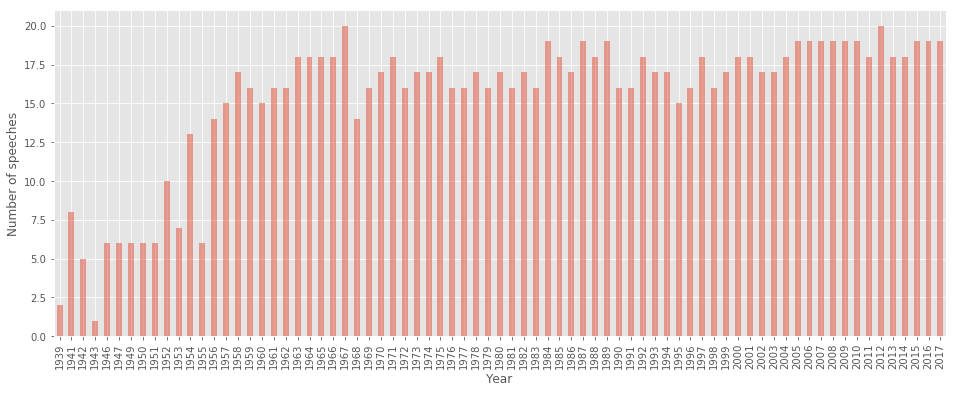

In [95]:
plt.figure(figsize=(16,6))
ax=year_cnt.sort_index().plot.bar(alpha=0.5)
ax.set_xticklabels(year_cnt.index.str.replace('^\s*(\d+)\s.*','\\1').sort_values(), rotation=90);
ax.set_ylabel('Number of speeches')
ax.set_xlabel('Year')

## Look at word and phrase frequencies

* Use simple normalization and tokenization 
    * lowercase
    * strip minimal punctuation (these are transcripts of spoken language)
        * leave `'` for contractions, e.g. `we'd`, `i'd`, etc.
    * split of white space    

In [8]:
def tokenize(text, lc=True, strip_chars=',!.'):
    if type(text) is not str:
        return
    if lc:
        text=text.lower()
    rdict = str.maketrans('','',strip_chars)
    tokens = text.translate(rdict).split()
    return tokens

In [123]:
df2.loc[:, 'tokens']=df2.Speech.apply(lambda s: tokenize(s))

In [124]:
df2.tokens[:5].values

array([ ['in', 'behalf', 'of', 'the', 'todd-ao', 'sound', 'department', 'i', 'accept', 'this', 'with', 'thanks'],
       ['this', 'is', 'an', 'award', 'given', 'to', 'an', 'entire', 'sound', 'department', 'and', 'they', 'all', 'deserve', 'it;', 'they', 'all', 'worked', 'on', 'it', "there's", 'one', 'man', 'i', 'want', 'to', 'thank', 'especially', "that's", 're-recording', 'mixer', 'william', 'steinkamp', 'for', 'his', 'very', 'excellent', 'work'],
       ['the', 'samuel', 'goldwyn', 'sound', 'department', 'wishes', 'to', 'thank', 'the', 'members', 'of', 'the', 'academy', 'for', 'this', 'honor', 'that', 'they', 'have', 'bestowed', 'upon', 'us', 'thank', 'youfred', 'hynes:the', 'todd-ao', 'sound', 'department', 'would', 'also', 'like', 'to', 'thank', 'the', 'academy', 'and', 'all', 'the', 'members', 'and', 'thanks', 'again', 'wonderful'],
       ['i', 'want', 'to', 'thank', 'all', 'the', 'members', 'of', 'the', 'academy', 'and', 'everyone', 'who', 'made', 'this', 'possible', 'especially'

* This seems to be a reasonable first step for examining the vocabulary in the speeches

### Word frequency distributions

In [104]:
word_dist = Counter()
for speech in df2.tokens:
    word_dist.update(speech)

* Top 50 most common words across all speeches

In [107]:
word_dist.most_common(50)

[('and', 6927),
 ('to', 5743),
 ('the', 5177),
 ('thank', 3994),
 ('you', 3971),
 ('i', 3890),
 ('of', 2826),
 ('my', 2509),
 ('for', 2420),
 ('a', 2316),
 ('this', 2161),
 ('in', 1556),
 ('that', 1539),
 ('all', 1468),
 ('me', 1258),
 ('very', 1253),
 ('who', 1227),
 ('so', 1121),
 ('it', 1097),
 ('is', 1066),
 ('like', 1043),
 ('much', 973),
 ('with', 926),
 ('want', 788),
 ('was', 706),
 ('have', 705),
 ('we', 692),
 ('be', 660),
 ('our', 642),
 ('on', 639),
 ("i'm", 628),
 ('academy', 597),
 ('here', 590),
 ('but', 577),
 ('people', 559),
 ('film', 542),
 ("i'd", 486),
 ('at', 475),
 ('great', 466),
 ('us', 465),
 ('would', 456),
 ('are', 442),
 ('just', 437),
 ('love', 420),
 ('know', 412),
 ("it's", 406),
 ('as', 403),
 ('say', 368),
 ('really', 363),
 ('thanks', 362)]

* There is a tendency in NLP toolkits and applications to remove stopwords (i.e. function or so-called 'non-content' words) before even generating lists.

* The danger in this approach (especially when you look at phrases) of missing interesting, important and distinguishing patterns

### Word distributions by category

* Use the `cat2` categories (first word from award name) and generate one frequency list per category

* Put these lists in a dictionary `word_dist_by_cat` for ease of comparison

In [128]:
word_dist_by_cat={}
for cat, cdf in df2.groupby('cat2'):
    word_dist_by_cat[cat]=Counter()
    cdf['tokens'].apply(lambda t: word_dist_by_cat[cat].update(t))

* Top 50 words in the _Actress_ category

In [139]:
word_dist_by_cat['Actress'].most_common(50)

[('and', 1176),
 ('to', 842),
 ('i', 785),
 ('you', 734),
 ('the', 700),
 ('thank', 626),
 ('my', 486),
 ('for', 424),
 ('of', 370),
 ('me', 325),
 ('this', 318),
 ('a', 307),
 ('so', 275),
 ('that', 270),
 ('in', 259),
 ('all', 196),
 ('it', 190),
 ('who', 183),
 ('much', 168),
 ('very', 162),
 ('have', 160),
 ('with', 150),
 ('is', 146),
 ('like', 136),
 ('was', 123),
 ('be', 115),
 ("i'm", 114),
 ('want', 113),
 ('know', 97),
 ('here', 86),
 ('are', 83),
 ('would', 83),
 ('but', 77),
 ('our', 76),
 ('your', 75),
 ('love', 75),
 ('academy', 71),
 ('on', 69),
 ('great', 68),
 ('her', 68),
 ('just', 67),
 ('we', 65),
 ('as', 62),
 ('people', 62),
 ('because', 61),
 ('really', 60),
 ('has', 59),
 ('been', 59),
 ('say', 57),
 ('tonight', 54)]

In [140]:
word_dist_by_cat['Actor'].most_common(50)

[('and', 1021),
 ('to', 804),
 ('i', 773),
 ('the', 722),
 ('you', 615),
 ('thank', 489),
 ('of', 468),
 ('a', 416),
 ('my', 372),
 ('for', 369),
 ('this', 308),
 ('that', 292),
 ('in', 246),
 ('me', 245),
 ('all', 205),
 ('who', 184),
 ('it', 182),
 ('very', 172),
 ('is', 163),
 ('so', 160),
 ('with', 156),
 ("i'm", 137),
 ('be', 129),
 ('was', 128),
 ('have', 121),
 ('like', 114),
 ('much', 113),
 ('here', 112),
 ('want', 110),
 ('but', 104),
 ('he', 96),
 ('know', 95),
 ('people', 85),
 ('we', 81),
 ('great', 79),
 ('just', 78),
 ('on', 78),
 ('academy', 78),
 ('love', 78),
 ('are', 76),
 ('say', 73),
 ('one', 72),
 ('not', 71),
 ("it's", 70),
 ('his', 70),
 ('wonderful', 69),
 ('would', 69),
 ('at', 69),
 ('as', 67),
 ('tonight', 65)]

### Normalizing frequency counts 

* To do comparisons between the categories need to get a token count for each category

In [144]:
token_cnts = { c: sum(word_dist_by_cat[c].values()) for c in word_dist_by_cat}

In [145]:
token_cnts

{'Actor': 22194,
 'Actress': 22165,
 'Best': 14630,
 'Cinematography': 4655,
 'Costume': 4050,
 'Directing': 10353,
 'Documentary': 13932,
 'Film': 5445,
 'Foreign': 3436,
 'Makeup': 4232,
 'Music': 13096,
 'Sound': 8645,
 'Special': 327,
 'Visual': 4689,
 'Writing': 12843}

* So can compare, for instance, the occurrences per 10,000 words of `thank` between _Actor_ and _Actress_ category speehces

In [146]:
word_dist_by_cat['Actor']['thank'] / token_cnts['Actor'] * 10000

220.32981886996487

In [148]:
word_dist_by_cat['Actress']['thank'] / token_cnts['Actress']*10000

282.4272501691857

### Function to compare frequencies of items across categories

* We can create a function to take the `word_dist_by_cat` dictionary and for a list of categories and items create a frequency table


* Default behavior is to calculate this for all items and categories and give raw frequencies

* But can limit to specific categories and/or words

* And also pass the `token_cnts` for normalization

In [216]:
def compare_freq(wdist, cats='All', words='All', norm=None):
    
    if words=='All':
        words_to_compare = set()
        for c in wdist:
            words_to_compare.update(wdist[c].keys())
        words=list(words_to_compare)
    
    cats = wdist.keys() if cats=='All' else cats
    
    data=[]
    
    for word in words:
        row={'item':word}
        total=0
        for c in cats:
            wcnt=wdist[c].get(word,0)
 
            total+=wcnt
            if norm:
                row[c]=wcnt/norm[c]*10000
            else:
                row[c]=wcnt
    
        if not norm:
            row['total']=total
        if total>0:   
            data.append(row)
            
    return pd.DataFrame(data)

* Make a normalized comparison table for all items for `Actor` and `Actress` categories

In [217]:
fdf=compare_freq(word_dist_by_cat, cats=['Actor','Actress'], norm=token_cnts)

In [218]:
fdf.sort_values('Actress', ascending=False)[:50]

,Actor,Actress,item
4668,460.034243,530.566208,and
5499,362.260070,379.878186,to
1389,348.292331,354.161967,i
1997,277.101919,331.152718,you
4004,325.313148,315.813219,the
1808,220.329819,282.427250,thank
1760,167.612868,219.264606,my
2911,166.261152,191.292578,for
105,210.867802,166.929844,of
1484,110.390196,146.627566,me


In [219]:
fdf2=compare_freq(word_dist_by_cat)
fdf2.sort_values('total', ascending=False)[:30]

,Actor,Actress,Best,Cinematography,Costume,Directing,Documentary,Film,Foreign,Makeup,Music,Sound,Special,Visual,Writing,item,total
11357,1021,1176,680,226,211,496,610,273,149,174,582,453,12,247,617,and,6927
13275,804,842,617,191,174,386,546,224,110,182,519,383,12,203,550,to,5743
9741,722,700,583,166,142,379,640,193,121,147,439,328,18,168,431,the,5177
4391,489,626,316,141,140,266,357,178,73,161,437,307,16,162,325,thank,3994
4873,615,734,323,132,120,275,272,182,96,143,397,269,13,96,304,you,3971
3301,773,785,342,140,90,320,229,114,106,60,356,143,8,42,382,i,3890
261,468,370,307,94,76,230,309,105,62,67,248,156,6,91,237,of,2826
4251,372,486,194,92,75,151,186,129,70,73,242,125,3,83,228,my,2509
7080,369,424,223,77,62,166,211,87,49,100,220,142,3,97,190,for,2420
5409,416,307,247,95,69,188,193,92,51,50,205,126,3,60,214,a,2316


### _Keyness_ analysis

* When we have frequency counts for an item (word, n-gram, collocate, etc) in two different texts or (sub)corpora, we can measure the strength of the difference in occurrence using various information metrics (e.g. log-likelihood, mutual information) and statistical measures (e.g. chi-square, Fisher-exact). (see https://corpora.lancs.ac.uk/sigtest/)


* The four pieces of information:
    1. frequency of item in first corpus/text
    2. size of first corpus/text
    3. frequency of item in second corpus/text
    4. size of second corpus/text
    
  can be organized as a contingency table


|             |  Corpus 1 |   Corpus 2 |
| ----------- | :--------:  | :--------: |
| __Item Frequency__   |  A         |       B     |
| __Corpus size__ |      C     |        D    |


* What these measures allow us to do is create a ranked ordering of words/phrases that are over (or under) used in the first corpus compared to their use in the second. Or another way to describe it might be highlight distinctive items in one corpus compared to the other.


* A commonly used measure if an information theoretic measure _log-likelihood_
    * see http://ucrel.lancs.ac.uk/llwizard.html for more details and a working calculator
    
    * we can implement this metric in a function `log_likelihood()`



In [225]:
def log_likelihood(item_A_freq, corpus_A_size, item_B_freq, corpus_B_size):
        
    E1 = corpus_A_size*(item_A_freq+item_B_freq) / (corpus_A_size+corpus_B_size)
    E2 = corpus_B_size*(item_A_freq+item_B_freq) / (corpus_A_size+corpus_B_size)

    G2 = 2*((item_A_freq*math.log(item_A_freq/E1)) + (item_B_freq*math.log(item_B_freq/E2)))
    
    sign = 1 if (item_A_freq / corpus_A_size) >= (item_B_freq / corpus_B_size) else -1
    
    return sign*G2

### Quantifying the difference of frequency between words in speeches for the _Actor_ and _Actress_ categories

* First we create a comparison table of the frequencies of words in two sets of speeches

In [358]:
aa_df=compare_freq(word_dist_by_cat, cats=['Actor','Actress'])

* Filter out items where there is no occurrences in one of the categories

In [359]:
aa_df2=aa_df[(aa_df['Actor']>0) & (aa_df['Actress']>0)].copy()

* Add a column to the data frame for the log likelihood value
    * use the `token_cnts` values to get the total corpus size for each category

In [363]:
aa_df2.loc[:,'keyness_LL']=aa_df2.apply(lambda row: log_likelihood(row['Actor'], token_cnts['Actor'], 
                                       row['Actress'], token_cnts['Actress']), axis=1)

* Rank values from largest to see the top 30 words more frequently used in _Actor_ than _Actress_ category speeches


* Some observations:
    * Award recipients in _Actor_ category reference their `wife` much more often that those in the _Actress_ category
    * Masculine personal pronouns (`he`, `his`) and masculine nouns (`man`, `men`, `actor`) are distinctive to the _Actor_ speeches
    *

In [361]:
aa_df2.sort_values('keyness_LL', ascending=False)[:30]

,Actor,Actress,item,total,keyness_LL
48,33,1,wife,34,38.069166
1512,96,41,he,137,22.643461
3437,70,25,his,95,22.135683
1014,42,10,man,52,21.132092
2237,416,307,a,723,16.353531
4936,72,36,one,108,12.185706
105,468,370,of,838,11.359109
4381,11,1,second,12,9.738399
4040,40,17,good,57,9.520496
5320,13,2,enough,15,8.999805


In [362]:
aa_df2.sort_values('keyness_LL', ascending=True)[:30]

,Actor,Actress,item,total,keyness_LL
2727,160,275,so,435,-30.917275
3721,20,68,her,88,-27.727762
1235,1,21,husband,22,-22.388710
2637,15,47,family,62,-17.382834
3472,2,20,women,22,-17.118032
1808,489,626,thank,1115,-17.055403
1760,372,486,my,858,-15.341160
5223,1,13,sister,14,-12.218895
1484,245,325,me,570,-11.370071
4668,1021,1176,and,2197,-11.148060


In [320]:
hits=df2[(df2['cat2']=='Actor') &
       (df2['tokens'].apply(lambda x: 'wife' in x))].tokens

In [313]:
def make_kwic(kw, tokens, win=[4,4]):
    lines=[]
    for i,t in enumerate(tokens):
        if t==kw:
            lines.append([tokens[i-win[0]:i], t, tokens[i+1:i+win[1]+1]])
    
    return lines

In [332]:
def get_kwic(kw, df, cats='All', win=[4,4]):
    hits=df[(df['cat2'].isin(cats)) &
           (df['tokens'].apply(lambda x: kw in x))].tokens
    kwic=[]
    for h in hits:
        kwic.extend(make_kwic(kw, h, win=win))
        
    return kwic

In [344]:
def print_kwic(kwic):
    line_tmpl="{: >{}}  {}  {}"
    left_pad = max([len(" ".join(l)) for l,_,_ in kwic])
    for left, kw, right in kwic:
        left_str=' '.join(left)
        right_str=' '.join(right)
        print(line_tmpl.format(left_str, left_pad+5, kw, right_str))

In [347]:
print_kwic(get_kwic('mom', df2, cats=['Actress','Actor'], win=[4,4]))

                you know be proud  mom  because i'm proud of
                 want to thank my  mom  and my dad; i
        thank you academy members  mom  and dad yeah look
              look whoo thank you  mom  and dad for turning
                     oh my dad my  mom  they loved show biz
               much i remember my  mom  getting all of us
                    of 117 and my  mom  and dad who i
                thank you so much  mom  for driving me to
               hoyt rob lorenz my  mom  and dad dave adele
             dropout and a single  mom  but somehow she managed
                   say i love you  mom  thank you for teaching
                  i may call your  mom  everybody i've told this
                  or so call your  mom  call your dad if
              thank you thank you  mom  and dad
                to the movies" my  mom  and dad's love of
               thank you for that  mom  and dad i love
             family my friends my  mom  at home and my
             

In [336]:
print_kwic(get_kwic('thank', df2, cats=['Actress'], win=[4,4]))

  thank  the ladies and gentlemen
i want to say  thank  you david selznick and
to say to him  thank  you hitch with all
– mr president chairman:  thank  you that is really
very gratefully i say  thank  you and i step
well as my own  thank  you
incentive to venture forward  thank  you for this very
happy and very grateful  thank  you
she would want to  thank  you if she were
  thank  you thank you everybody
  thank  you everybody i'm a
way i want to  thank  my old friends for
everyone for their charity  thank  you
i want to say  thank  you to everybody who
i can only say  thank  you with all my
this possible for me  thank  you
pavan:i just want to  thank  you all and i
privilege to try to  thank  her to thank you
to thank her to  thank  you for her but
and every affectionate thought  thank  you for ingrid
nine years old i  thank  you very much and
think anybody could have  thank  you
  thank  you very much ladies
ladies and gentlemen and  thank  you ladies and gentlemen
made this possib

## Looking at the first five words

In [99]:
first_5_words=df.tokens.apply(lambda t: None if t is None or len(t) < 5 else  ' '.join(t[:5]))

In [29]:
edges=Counter()

for item, freq in Counter(first_5_words).most_common():
    if not item or freq<3:
        continue
        
    
    nodes=item.split()
    edges.update((('START',nodes[0]),)*freq)
    edges.update([(nodes[i],nodes[i+1]) for i,_ in enumerate(nodes[:-1])]*freq)
    

In [30]:
edges.most_common()

[(('thank', 'you'), 122),
 (('START', 'thank'), 94),
 (('to', 'thank'), 44),
 (('you', 'very'), 44),
 (('very', 'much'), 40),
 (('like', 'to'), 30),
 (('thank', 'the'), 29),
 (('you', 'thank'), 28),
 (('START', 'i'), 26),
 (('you', 'so'), 26),
 (('so', 'much'), 20),
 (("i'd", 'like'), 18),
 (('START', "i'd"), 15),
 (('want', 'to'), 13),
 (('much', 'to'), 12),
 (('you', 'all'), 10),
 (('i', 'want'), 10),
 (('i', 'would'), 9),
 (('would', 'like'), 9),
 (('much', 'i'), 9),
 (('much', 'thank'), 8),
 (('much', 'this'), 8),
 (('you', 'to'), 7),
 (('to', 'the'), 7),
 (('the', 'academy'), 7),
 (('all', 'very'), 7),
 (('much', 'members'), 6),
 (('i', 'wish'), 4),
 (('wish', 'to'), 4),
 (('START', 'oh'), 4),
 (('oh', 'my'), 4),
 (('my', 'god'), 4),
 (('god', 'thank'), 4),
 (('much', "i'm"), 4),
 (('thank', 'all'), 3),
 (('much', "it's"), 3),
 (('START', 'well'), 3),
 (('well', "i'd"), 3),
 (('much', 'for'), 3),
 (('i', 'just'), 3),
 (('just', 'want'), 3),
 (('to', 'say'), 3),
 (('you', 'ladies')

In [32]:
edge_list = [ (s,t, str(round(math.log10(f+0.1),3))) for (s,t),f in edges.items()]

In [33]:
DG=nx.DiGraph()
DG.add_weighted_edges_from(edge_list)

In [150]:
G = graphviz.Digraph()
for s,t, d in DG.edges(data=True):
    print(s,t,d['weight'])
    G.edge(s,t, penwidth=d['weight'])

START i'd 1.179
START thank 1.974
START i 1.417
START oh 0.613
START well 0.491
START it's 0.491
START we'd 0.491
i'd like 1.258
like to 1.479
to thank 1.644
to the 0.851
to say 0.491
thank the 1.464
thank you 2.087
thank all 0.491
the academy 0.851
you thank 1.449
you very 1.644
you to 0.851
you so 1.417
you all 1.004
you ladies 0.491
very much 1.603
i would 0.959
i want 1.004
i wish 0.613
i just 0.491
would like 0.959
so much 1.303
much to 1.083
much i 0.959
much thank 0.908
much this 0.908
much i'm 0.613
much it's 0.491
much for 0.491
much members 0.785
all very 0.851
want to 1.117
wish to 0.613
oh my 0.613
my god 0.613
god thank 0.613
it's a 0.491
well i'd 0.491
just want 0.491
ladies and 0.491
and gentlemen 0.491
a great 0.491
great honor 0.491
honor to 0.491
we'd like 0.491


In [151]:
G.attr(rankdir='LR')
G.node('START', shape='rect', fillcolor='lightgray', style='filled')
print(G.source)

digraph {
		START -> "i'd" [penwidth=1.179]
		START -> thank [penwidth=1.974]
		START -> i [penwidth=1.417]
		START -> oh [penwidth=0.613]
		START -> well [penwidth=0.491]
		START -> "it's" [penwidth=0.491]
		START -> "we'd" [penwidth=0.491]
		"i'd" -> like [penwidth=1.258]
		like -> to [penwidth=1.479]
		to -> thank [penwidth=1.644]
		to -> the [penwidth=0.851]
		to -> say [penwidth=0.491]
		thank -> the [penwidth=1.464]
		thank -> you [penwidth=2.087]
		thank -> all [penwidth=0.491]
		the -> academy [penwidth=0.851]
		you -> thank [penwidth=1.449]
		you -> very [penwidth=1.644]
		you -> to [penwidth=0.851]
		you -> so [penwidth=1.417]
		you -> all [penwidth=1.004]
		you -> ladies [penwidth=0.491]
		very -> much [penwidth=1.603]
		i -> would [penwidth=0.959]
		i -> want [penwidth=1.004]
		i -> wish [penwidth=0.613]
		i -> just [penwidth=0.491]
		would -> like [penwidth=0.959]
		so -> much [penwidth=1.303]
		much -> to [penwidth=1.083]
		much -> i [penwidth=0.959]
		much -> thank [penw

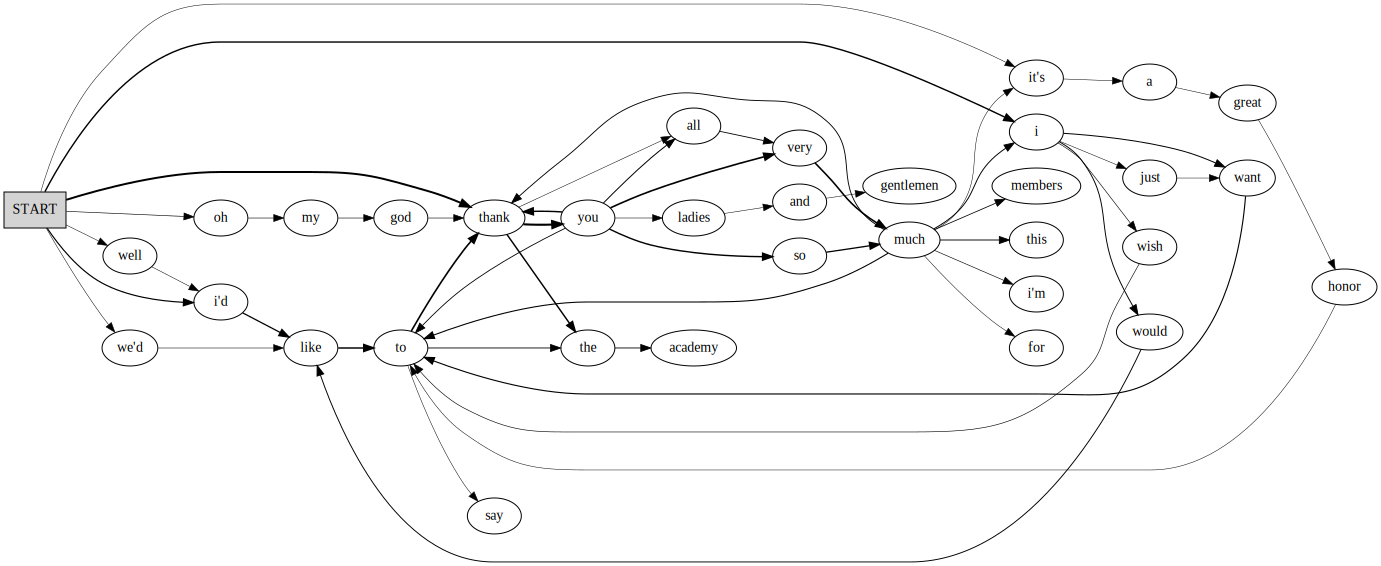

In [152]:
G

In [205]:
Counter(first_5_words).most_common(50)

[(None, 66),
 ("i'd like to thank the", 15),
 ('thank you thank you very', 11),
 ('i would like to thank', 9),
 ('thank you to the academy', 7),
 ('thank you so much to', 7),
 ('thank you all very much', 7),
 ('i want to thank the', 7),
 ('thank you very much i', 6),
 ('thank you thank you so', 6),
 ('thank you very much to', 5),
 ('thank you very much thank', 5),
 ('i wish to thank the', 4),
 ('thank you so much this', 4),
 ('thank you very much this', 4),
 ('oh my god thank you', 4),
 ("thank you very much i'm", 4),
 ('thank you thank you thank', 4),
 ('i want to thank all', 3),
 ("thank you very much it's", 3),
 ('thank you so much i', 3),
 ("well i'd like to thank", 3),
 ('thank you very much for', 3),
 ('i just want to say', 3),
 ('thank you thank you all', 3),
 ('thank you ladies and gentlemen', 3),
 ('thank you very much members', 3),
 ("it's a great honor to", 3),
 ('thank you so much members', 3),
 ('thank you so much thank', 3),
 ("we'd like to thank the", 3),
 ('ladies and g